In [4]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt 

# 加载数据集（首次运行会自动下载约70MB数据）
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)
 
# 查看数据维度
print("样本数量:", X.shape[0])  # 70000个样本
print("特征维度:", X.shape[1])  # 每个数字是28x28=784像素

样本数量: 70000
特征维度: 784


In [6]:
# 归一化处理（将像素值从0-255缩放到0-1）
X = X / 255.0
 
# 分割训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=42)

Train: X=(60000, 784), y=(60000,)
Test: X=(10000, 784), y=(10000,)
KNN准确率: 0.9696


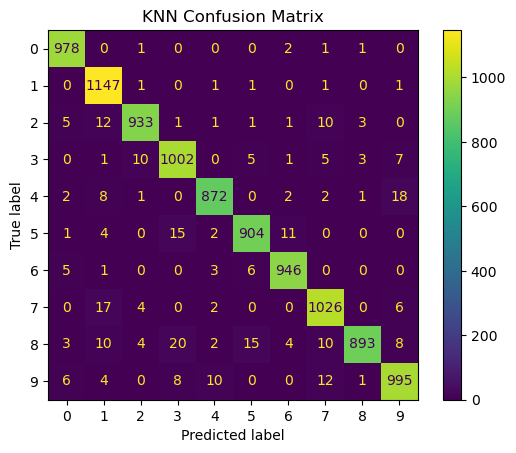

In [8]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
 
# 创建KNN分类器（选择k=5）
knn = KNeighborsClassifier(n_neighbors=5)
 
# 训练模型
knn.fit(X_train, y_train)
 
# 预测测试集
y_pred = knn.predict(X_test)
 
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN准确率: {accuracy:.4f}")
 
# 可视化混淆矩阵
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("KNN Confusion Matrix")
plt.show()
